#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles.

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [1]:
# Run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.5/363.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.4/871.4 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.7/638.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=a92e9479cc36b55ee20b4a9de8b2ad5bd805902ac39ef8e0f068061499ad0b0a
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin




---


*Simpler to gather all necessary imports in one cell*


---



In [56]:
import awkward, uproot, numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit


All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [ ]:
## Gonna get the file from the url (apologies...)

import wget
url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
download=wget.download(url)
!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root



---


**Comment:**
The file will be opened using uproot, such that it can be manipulated later using python code. Similar approaches can also be achieved by staying in ROOT (ROOT.TFile.Open()).


---



In [5]:
## Opening the file using uproot, find with which key our tree is stored.
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")
f.keys()

['DecayTree;1']

In [10]:
# It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()

# Inside, data is again stored in a dictionary way - parameters can be accessed over the key.
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [6]:
# Now it shows us all the variables inside, their type and so on
# Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

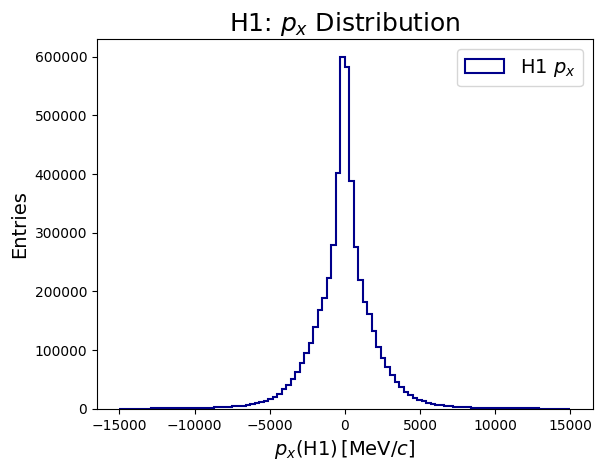

In [40]:
## Create an exemplary plot

# Create the figure
plt.figure()

# Plot histogram as a step function (resembles the standard way ROOT plots graphs)
plt.hist(data, histtype="step", bins=100, range = (-15000, 15000), color = "darkblue", linewidth = 1.5)

# Axis labels, spacing and general polishing - assuming normal units
plt.xlabel(r"$p_x(\mathrm{H1}) \, [\mathrm{MeV}/c]$", fontsize=14)
plt.ylabel("Entries", fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title("H1: $p_x$ Distribution", fontsize=18)
plt.legend(["H1 $p_x$"], fontsize=14, loc="upper right")

<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?



---


**Comments:** If the momenta of each particle are given in cartesian coordinates, the total momentum is simply the norm of that vector:

$P_{tot} = \sqrt{P_x^2 + P_y^2 + P_z^2}$

Doing so for each data point, we also get a distribution of total momenta.


---



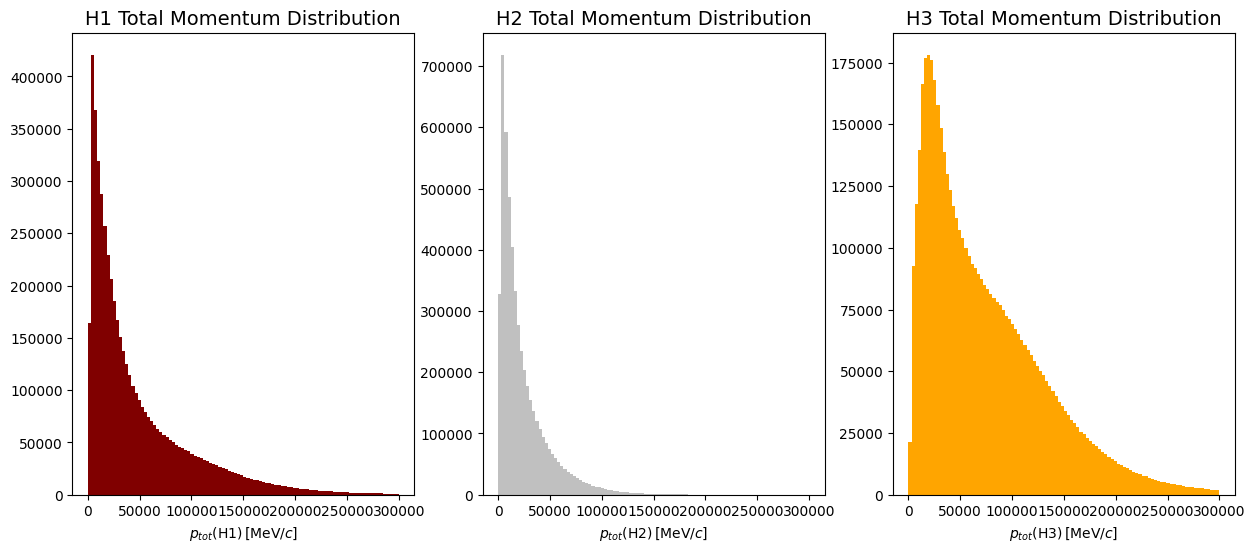

In [7]:
## Creating the plot for the total momentum of each of the three daughters. Uses dictionaries, such that later tasks become simpler.

## Defining some functions first, can be accessed later
def Momentum_comp(Tree, particle):
    """
    Yields px, py, and pz arrays for a given particle.
    """
    px, py, pz = (Tree[f"{particle}_P{i}"].array() for i in ["X", "Y", "Z"])
    return px, py, pz

def total_momentum(px, py, pz):
    """
    Calculates the total momentum for the particle.
    Returns:
        Total momentum.
    """
    return np.sqrt(px**2 + py**2 + pz**2)

Events = f['DecayTree']

## Yield components for every daughter
P_comp = {}
for name in ["H1", "H2", "H3"]:
    P_comp[name] = Momentum_comp(Events, name)

## Compute total momentum for each daughter
H_Ptot = {}
for i, particle in enumerate(["H1", "H2", "H3"], start=1):
    Px, Py, Pz = P_comp[particle]
    H_Ptot[f"{particle}_Ptot"] = total_momentum(Px, Py, Pz)

## Plotting the distributions, proper ranges
plt.figure(figsize = (15,6))

colours = ["maroon", "silver", "orange"]

for i in [1,2,3]:
  plt.subplot(1,3,i)
  plt.hist(H_Ptot[f"H{i}_Ptot"], bins=100, range=(0,300000), color = colours[i-1])
  plt.xlabel(rf"$p_{{tot}}(\mathrm{{H{i}}}) \, [\mathrm{{MeV}}/c]$", fontsize=10)
  plt.title(f"H{i} Total Momentum Distribution", fontsize=14)


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).



---


**Comments:** The mothers momentum sums up all vector components of the daughters.

---



Text(0.5, 1.0, 'Mother: Total Momentum Distribution')

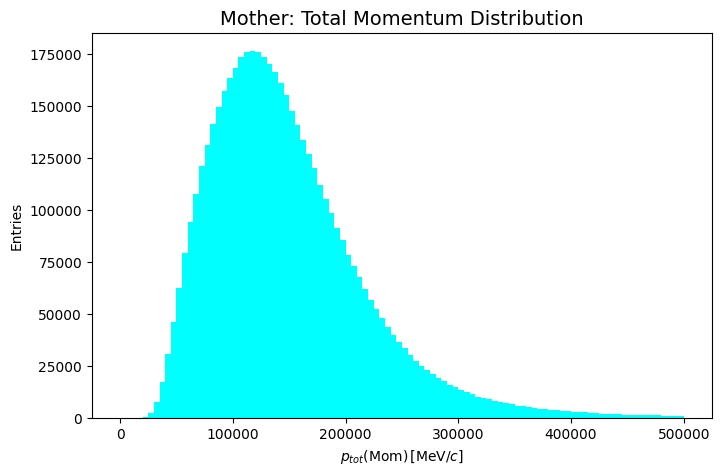

In [8]:
## Collect data about momentum of mother.

# Find momentum vector of mother particle.
M_px = sum(P_comp[par][0] for par in ["H1", "H2", "H3"])
M_py = sum(P_comp[par][1] for par in ["H1", "H2", "H3"])
M_pz = sum(P_comp[par][2] for par in ["H1", "H2", "H3"])

# Calculate total momentum.
M_Ptot = np.sqrt(M_px**2 + M_py**2 + M_pz**2)

plt.figure(figsize=(8,5))
plt.hist(M_Ptot, bins=100, range=(0,500000), color = "cyan")
plt.xlabel(rf"$p_{{tot}}(\mathrm{{Mom}}) \, [\mathrm{{MeV}}/c]$", fontsize=10)
plt.ylabel("Entries", fontsize=10)
plt.title(f"Mother: Total Momentum Distribution", fontsize=14)

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [9]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()
# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print (f"- {branch}  :  {value}")

Event number #45
-------------------
- B_FlightDistance  :  257.00205776946603
- B_VertexChi2  :  1.865567179221614
- H1_PX  :  420.3413896413646
- H1_PY  :  -110.66276079201207
- H1_PZ  :  5883.766388082404
- H1_ProbK  :  0.012183159589767456
- H1_ProbPi  :  0.8191394209861755
- H1_Charge  :  -1
- H1_IPChi2  :  27121.53690741779
- H1_isMuon  :  1
- H2_PX  :  -985.6367588987478
- H2_PY  :  630.9893539299605
- H2_PZ  :  35342.13861801284
- H2_ProbK  :  0.6670113801956177
- H2_ProbPi  :  0.04563945531845093
- H2_Charge  :  1
- H2_IPChi2  :  13712.438218214942
- H2_isMuon  :  0
- H3_PX  :  -6242.300384410311
- H3_PY  :  -862.2130979651508
- H3_PZ  :  277275.49225626234
- H3_ProbK  :  0.07501816749572754
- H3_ProbPi  :  0.428352952003479
- H3_Charge  :  1
- H3_IPChi2  :  1026.12298434195
- H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.



---


**Comment:** As mentioned above, at their speeds, the particles follow relativistic energy $E^2 = p^2 + m^2$ (leaving out the c). In other words, $E = \sqrt{p^2 + m^2}$ can be used in finding the energies.


---



In [10]:
## Kaon mass (same for particle and antiparticle) according to wikipedia
m_K = 493.677

E_H1 = np.sqrt(H_Ptot["H1_Ptot"]**2 + m_K**2)
E_H2 = np.sqrt(H_Ptot["H2_Ptot"]**2 + m_K**2)
E_H3 = np.sqrt(H_Ptot["H3_Ptot"]**2 + m_K**2)

print("The energies are as follows")
print(f"Energy of H1: {E_H1}")
print(f"Energy of H2: {E_H2}")
print(f"Energy of H3: {E_H3}")

The energies are as follows
Energy of H1: [5.18e+04, 3.26e+05, 9.08e+04, 8.69e+04, ..., 3.73e+04, 3.59e+04, 5.23e+03]
Energy of H2: [1.77e+04, 5.35e+03, 1.79e+04, 2.03e+04, ..., 6.37e+03, 7.76e+03, 2.21e+04]
Energy of H3: [1.06e+05, 8.77e+04, 8.56e+04, 1.47e+04, ..., 1.07e+04, 1.14e+05, 1.15e+05]


We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*



---
**Comment:** In a collision on the particle collision, one can neglect any loss of energy or momentum (in a perfect system). If we apply energy and momentum conservation, the energy of the mother (B) is the energy of its daughters (Ks). The mass can be simply gotten by reversing the relativistic energy equation:
$m = \sqrt{E^2 - p^2}$


---



Text(0.5, 1.0, 'Mother: Mass Distribution')

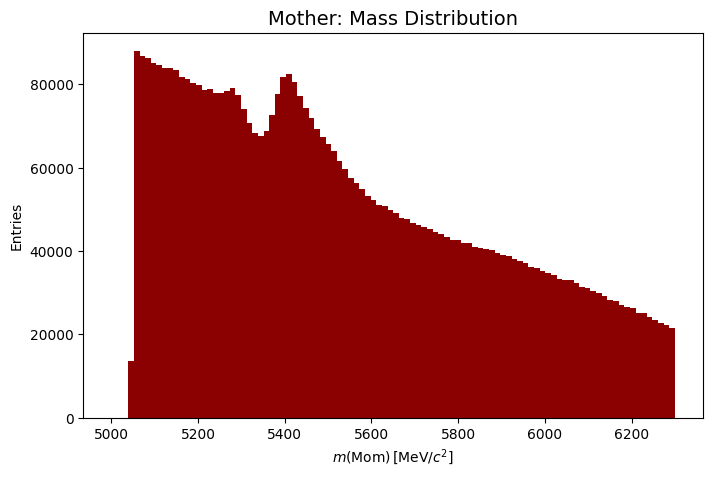

In [20]:
## Calculating the energy of the mother from its daughters. M stands for mother.

E_M = E_H1 + E_H2 + E_H3

m_M = np.sqrt(E_M**2 - M_Ptot**2)


## Plotting the distribution
plt.figure(figsize=(8,5))
plt.hist(m_M, bins=100, range=(5000,6300), color = "darkred")
plt.xlabel(rf"$m(\mathrm{{Mom}}) \, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=10)
plt.ylabel("Entries", fontsize=10)
plt.title(f"Mother: Mass Distribution", fontsize=14)


**Interpretation:** The theory suggests a mass of $m_B \approx 5279.34 \frac{MeV}{c^2}$ according to Wikipedia. One could find a slim peak in that region of the mass distribution, but the data still doesn't seem refined enough to distinguish it from the background, as there is another bigger peak at approx 5400.

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

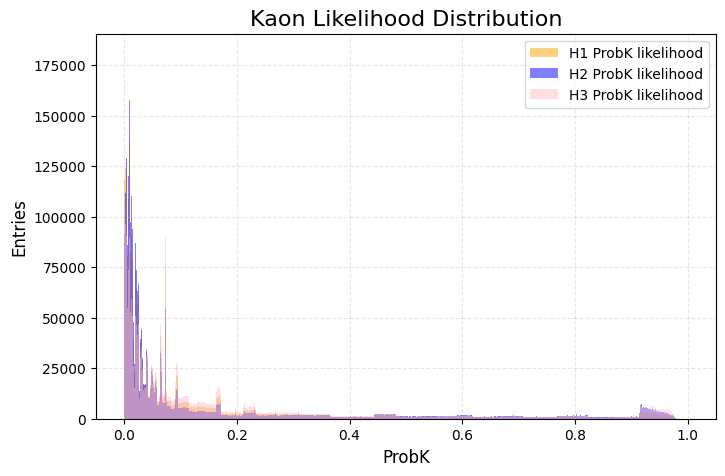

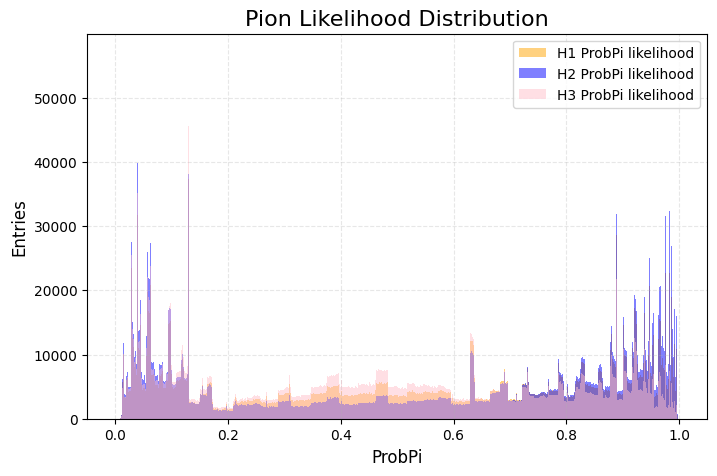

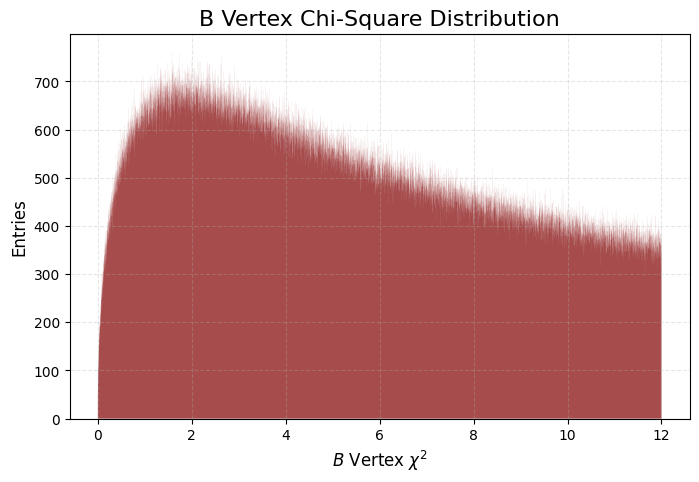

In [41]:
#Make plots of H1/H2/H3 _ProbK on one plot
#Make plots of H1/H2/H3 _ProbPi on one plot

def plot_likelihood(branches, particles, var_name, colors, xlabel, title):
    """
    Plots likelihood distributions for the given particles and variable. Allows for various forms of customization.
    """
    plt.figure(figsize=(8, 5))
    for particle, color in zip(particles, colors):
        plt.hist(branches[f"{particle}_{var_name}"], bins=1000, range=(0, 1),
                 color=color, alpha=0.5, label=f"{particle} {xlabel} likelihood")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Entries", fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.3)


## Preparatory steps
particles = ["H1", "H2", "H3"]
colors = ["orange", "blue", "pink"]

# Kaon likelihood plot
plot_likelihood(branches, particles, "ProbK", colors, "ProbK", "Kaon Likelihood Distribution")
# Pion likelihood plot
plot_likelihood(branches, particles, "ProbPi", colors, "ProbPi", "Pion Likelihood Distribution")


## B_VertexChi2 distributions
plt.figure(figsize=(8, 5))
plt.hist(branches["B_VertexChi2"], bins=10000, color="maroon", alpha=0.7, histtype="stepfilled")
plt.xlabel(r"$B$ Vertex $\chi^2$", fontsize=12)
plt.ylabel("Entries", fontsize=12)
plt.title("B Vertex Chi-Square Distribution", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)


Using these plots, we can now think about making a preselection. This has some format like the below:



---


**Interpretations:** If we trust the software, we should try to cut out events with low kaon probabilities. It shouldn't be necessary (or even helpful) to cut on the pion probabilities, not only since the distribution doesn't have any clear trigger level.

From the plots, proper selection on ProbK means cutting below 0.25. An unnecessarily harsh selection will have a worse effect later on...

Similarly, we can choose a $B_{vertex} χ^2$ < 6.

Lastly, since it is that easy, let's just include all muon events.

---



In [79]:
## Define the selection.

selection=((branches['H1_ProbK']>0.25) & (branches['H2_ProbK']>0.25) & (branches['H3_ProbK']>0.25) & (branches['B_VertexChi2'] < 6) & (branches['H1_isMuon'] == 0) & (branches['H2_isMuon'] == 0) & (branches['H3_isMuon'] == 0))

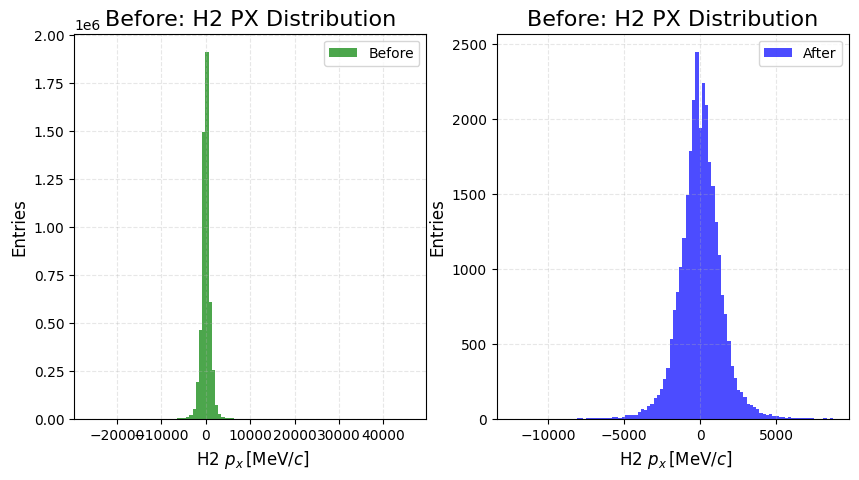

In [80]:
# Applying the selection on the tree
CutTree= branches[selection]

## Plotting p_x before and after selection

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.hist(branches["H2_PX"], bins=100, color="green", alpha=0.7, histtype="stepfilled", label = "Before")
plt.xlabel(r" H2 $p_{{x}} \, [\mathrm{{MeV}}/{{c}}]$", fontsize=12)
plt.ylabel("Entries", fontsize=12)
plt.title("Before: H2 PX Distribution", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.subplot(1,2,2)
plt.hist(CutTree["H2_PX"], bins=100, color="blue", alpha=0.7, histtype="stepfilled", label = "After")
plt.xlabel(r" H2 $p_{{x}} \, [\mathrm{{MeV}}/{{c}}]$", fontsize=12)
plt.ylabel("Entries", fontsize=12)
plt.title("Before: H2 PX Distribution", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()



#Try plotting our H2_PX distribution with and without the selection and spot the differences...

**Comparison:** It appears that the events with approx 0 x momentum were cut the most.

Number of entries before selection: 5135823
Number of entries before selection: 29485


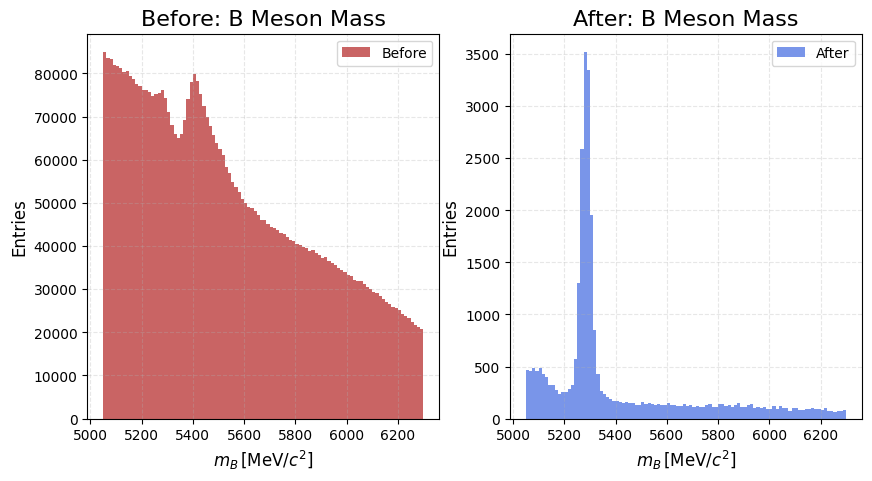

In [81]:
# Preparing the daughter data:
H1_Ptot_cut = np.sqrt(CutTree['H1_PX']**2 + CutTree['H1_PY']**2 + CutTree['H1_PZ']**2)
H2_Ptot_cut = np.sqrt(CutTree['H2_PX']**2 + CutTree['H2_PY']**2 + CutTree['H2_PZ']**2)
H3_Ptot_cut = np.sqrt(CutTree['H3_PX']**2 + CutTree['H3_PY']**2 + CutTree['H3_PZ']**2)

H1_E_cut = np.sqrt(H1_Ptot_cut**2 + m_K**2)
H2_E_cut = np.sqrt(H2_Ptot_cut**2 + m_K**2)
H3_E_cut = np.sqrt(H3_Ptot_cut**2 + m_K**2)


# Calculate the component form for the mother's momentum
M_px_cut = CutTree['H1_PX'] + CutTree['H2_PX'] + CutTree['H3_PX']
M_py_cut = CutTree['H1_PY'] + CutTree['H2_PY'] + CutTree['H3_PY']
M_pz_cut = CutTree['H1_PZ'] + CutTree['H2_PZ'] + CutTree['H3_PZ']

# Determine tot energy, momentum of mother.
Ptot_M_cut = np.sqrt(M_px_cut**2 + M_py_cut**2 + M_pz_cut**2)
E_M_cut = H1_E_cut + H2_E_cut + H3_E_cut

# Calculate the mass of the mother
m_M_cut = np.sqrt(E_M_cut**2 - Ptot_M_cut**2)


## Plot Histogram of B meson mass before vs after selection
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(m_M, bins=100, color="firebrick", alpha=0.7, histtype="stepfilled", label = "Before")
plt.xlabel("$m_B\, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=12)
plt.ylabel("Entries", fontsize = 12)
plt.title("Before: B Meson Mass", fontsize = 16)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

# Histogram H2_PX after selection
plt.subplot(1, 2, 2)
plt.hist(m_M_cut, bins=100, color="royalblue", alpha=0.7, histtype="stepfilled", label = "After")
plt.xlabel("$m_B \, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=12)
plt.ylabel("Entries", fontsize = 12)
plt.title("After: B Meson Mass", fontsize = 16)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()


# Check number of events before and after
print("Number of entries before selection: " + str(len(m_M)))
print("Number of entries before selection: " + str(len(m_M_cut)))

**Interpretation:** The number of events was drastically cut, most likely also including signal events (i.e. B-Meson events). The selection reveals a peak at around 5280 MeV, quite consistent with the actual value. "Stealing" Laura (Brijan)'s idea, overlaying the two histograms should reveal if the previous assumption of the smaller peak being due to the B-mesons is true.

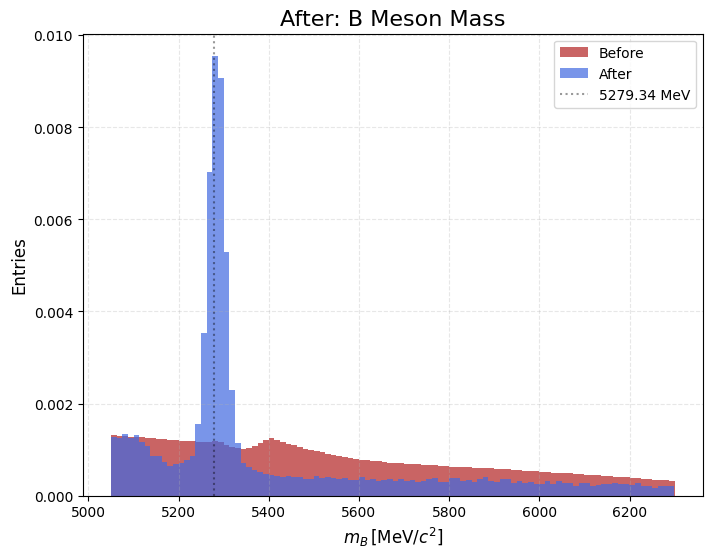

In [82]:
plt.figure(figsize=(8,6))
plt.hist(m_M, bins=100, color="firebrick", alpha=0.7, density=True, histtype="stepfilled", label = "Before")
plt.hist(m_M_cut, bins=100, color="royalblue", alpha=0.7, density=True, histtype="stepfilled", label = "After")
plt.xlabel("$m_B\, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=12)
plt.ylabel("Entries", fontsize = 12)
plt.title("After: B Meson Mass", fontsize = 16)
plt.grid(True, linestyle='--', alpha=0.3)
plt.axvline(5279.34, color = "black", alpha = 0.4, linestyle=":", label = "5279.34 MeV")
plt.legend()


**Conclusion:** The initial assumption was correct, and the selection reveals the peak at the correct position.

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

**Narration:** Let's first try fitting a Gaussian pdf to the signal.

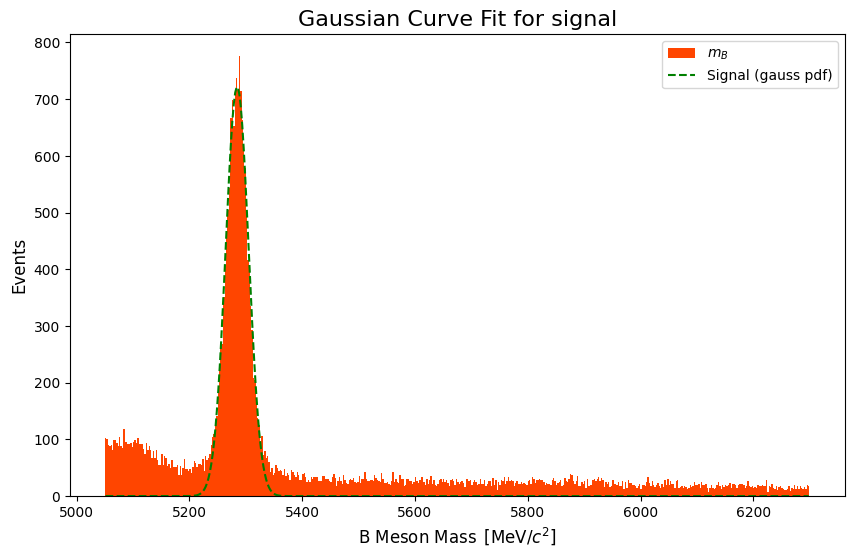

In [137]:
## Figure, axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram and extract bin height and bin edges
bin_height, bin_edge, _ = ax.hist(m_M_cut, bins=500, range=(min(m_M_cut), max(m_M_cut)), label="$m_{{B}}$", color="orangered")
bin_centers = (bin_edge[:-1] + bin_edge[1:]) / 2

# Gaussian pdf for fitting, together with initial parameters p0
def gauss(x, *p):
    A, mu, sigma = p
    return A * np.exp(-(x - mu)**2 / (2. * sigma**2))

p0 = [np.max(bin_height), np.mean(m_M_cut), 15]

## Perform the curve fit, calculating the best fit parameters
popt, pcov = curve_fit(gauss, bin_centers, bin_height, p0=p0)
y_gauss = gauss(bin_centers, *popt)

# Plot the Gaussian fit on top of the histogram
ax.plot(bin_centers, y_gauss, label="Signal (gauss pdf)", color="green", linestyle="--")

# Set labels and title
ax.set_xlabel("B Meson Mass $\, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=12)
ax.set_ylabel("Events", fontsize=12)
ax.set_title("Gaussian Curve Fit for signal", fontsize=16)
ax.legend()


In [138]:
# Explore optimisedParameters - what does it contain?
print("Parameters corresponding to Gaussian Fit:")
print(f"Amplitude A = {popt[0]}")
print(f"Mean mu  = {popt[1]}")
print(f"Stdev sigma = {popt[2]}")

Parameters corresponding to Gaussian Fit:
Amplitude A = 721.9912580337345
Mean mu  = 5284.61986362486
Stdev sigma = 20.32696086107962


**Narration:** What about the background? Let's try a Chebychev polynomial...

[ 6.65393686e+04 -1.05782633e+01 -9.60988012e-04 -9.13360660e-08
  7.94059660e-12  8.43651240e-16  7.52547887e-20  1.02487808e-24
 -3.15482946e-28 -4.04188704e-32 -4.30743646e-36 -3.12997853e-40
  2.81730087e-44  3.30177634e-48  2.47599982e-53  3.99745151e-57
 -1.24487489e-61 -8.82252661e-65 -2.49450648e-69  9.88234852e-74
  1.39083432e-77]


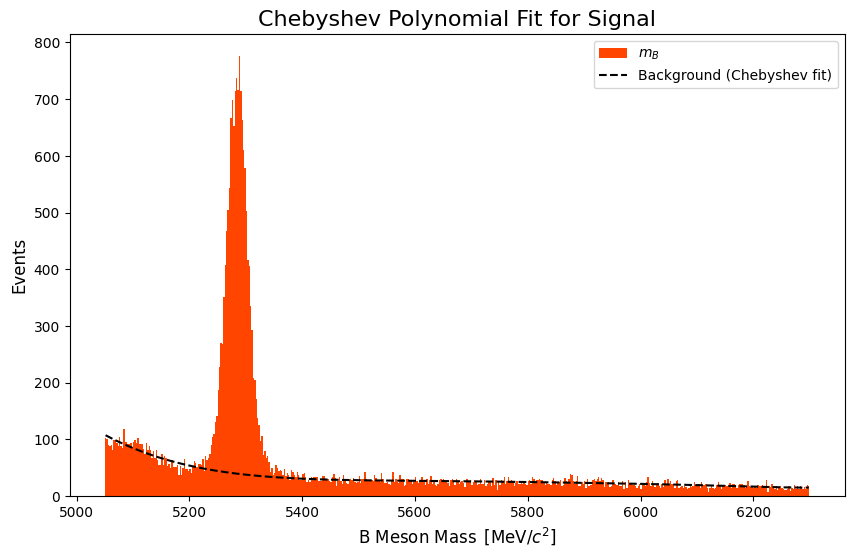

In [143]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram and extract bin height and bin edges
bin_height, bin_edge, _ = ax.hist(m_M_cut, bins=500, range=(min(m_M_cut), max(m_M_cut)), label="$m_{{B}}$", color="orangered")
bin_centers = (bin_edge[:-1] + bin_edge[1:]) / 2

## Note: This one is heavily influenced by ChatGPT
# Define the Chebyshev polynomial of the first kind [Tn(x)] for fitting, exclude peak range and define initial parameters.
def chebyshev_poly(x, *p):
    cheb_poly = np.polynomial.Chebyshev(p)
    return cheb_poly(x)

mask = (bin_centers < 5200) | (bin_centers > 5400)  # True for values outside of [5200, 5400]

# Only for the curvefit itself: Apply the mask to both the bin_centers and bin_height
bin_centers_masked = bin_centers[mask]
bin_height_masked = bin_height[mask]

# Initial Guess
degree = 20 # arbitrary, but higher degree should lead to higher accuracy
p0 = np.zeros(degree + 1)

# Perform the curve fit, calculating the best fit parameters using the masked data
popt2, pcov = curve_fit(chebyshev_poly, bin_centers_masked, bin_height_masked, p0=p0)
y_cheb = chebyshev_poly(bin_centers, *popt2)

# Plot the Chebyshev fit on top of the histogram
ax.plot(bin_centers, y_cheb, label="Background (Chebyshev fit)", color="black", linestyle="--")

# Set labels and title
ax.set_xlabel("B Meson Mass $\, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=12)
ax.set_ylabel("Events", fontsize=12)
ax.set_title("Chebyshev Polynomial Fit for Signal", fontsize=16)
ax.legend()

print(popt2)

**Narration:** It seems that the curve has taken on a exponential-like shape. One can now fit both curves on the same graph. Might as well try out the exponential.

<ipython-input-158-697be7b34948>:10: RuntimeWarning: overflow encountered in exp
  return B * np.exp(-lamb * (x-x0))


[4.55282933e+01 1.76516363e-03 5.39656656e+03]


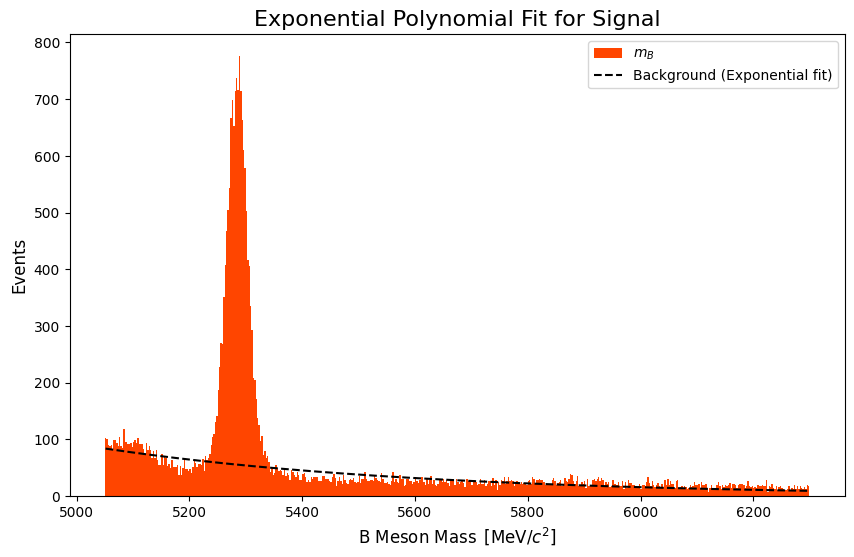

In [158]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram, extract bin height and bin edges
bin_height, bin_edge, _ = ax.hist(m_M_cut, bins=500, range=(min(m_M_cut), max(m_M_cut)), label="$m_{{B}}$", color="orangered")
bin_centers = (bin_edge[:-1] + bin_edge[1:]) / 2

# Define the Exponential for fitting, exclude peak range and define initial parameters.
def exponential(x, B, lamb, x0):
    return B * np.exp(-lamb * (x-x0))

mask = (bin_centers < 5200) | (bin_centers > 5400)  # True for values outside of [5200, 5400] -- Peak region

# Only for the curvefit itself: Apply the mask to both the bin_centers and bin_height
bin_centers_masked = bin_centers[mask]
bin_height_masked = bin_height[mask]

# Initial gueses (proposes the the exponential to be at the mean value during the peak)
p0_exp = [np.mean(bin_height_masked), 0.001, 5279]

# Perform the curve fit, calculating the best fit parameters using the masked data
popt, pcov = curve_fit(exponential, bin_centers_masked, bin_height_masked, p0=p0_exp)

y_exp = exponential(bin_centers, *popt)

# Plot the Exponential fit on top of the histogram
ax.plot(bin_centers, y_exp, label="Background (Exponential fit)", color="black", linestyle="--")

# Set labels and title
ax.set_xlabel("B Meson Mass $\, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=12)
ax.set_ylabel("Events", fontsize=12)
ax.set_title("Exponential Polynomial Fit for Signal", fontsize=16)
ax.legend()

print(popt)

**Narration:** Now both can be combined.

[6.87927447e+02 5.28477933e+03 1.79992777e+01 1.41401811e+02
 1.75586130e-03 4.74083855e+03]


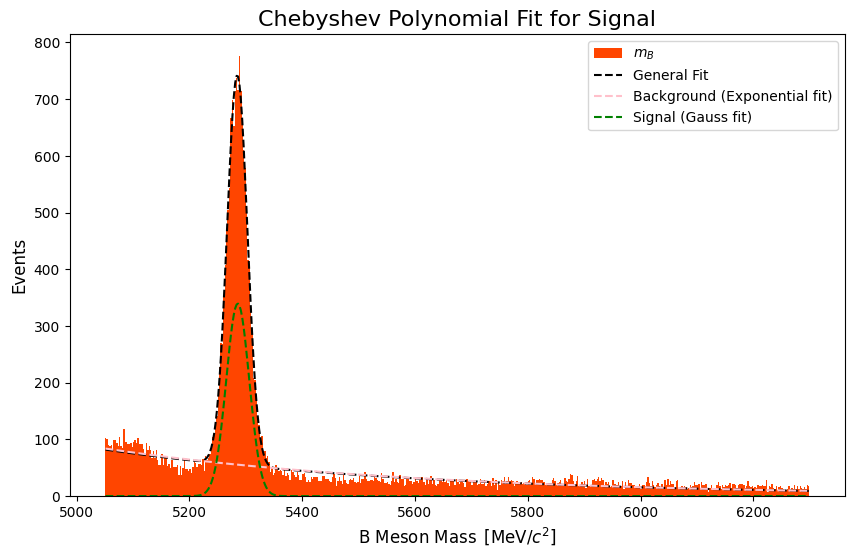

In [190]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram and extract bin height and bin edges
bin_height, bin_edge, _ = ax.hist(m_M_cut, bins=500, range=(min(m_M_cut), max(m_M_cut)), label="$m_{{B}}$", color="orangered")
bin_centers = (bin_edge[:-1] + bin_edge[1:]) / 2

# Define a combined pdf of Gaussian and Exponential, set initial parameters based on previous experience
def combined_pdfs(x, A, mu, sigma, B, lamb, x0):
    """
    Combination: Gaussian + Exponential
    """
    return gauss(x, A, mu, sigma) + exponential(x, B, lamb, x0)

p0 = [722, 5280, 22, 45, 0.0017, 5279] # Note: Using the previously used init. param. does not work out properly.

# Perform the curve fit, calculating the best fit parameters
popt_co, pcov_co = curve_fit(combined_pdfs, bin_centers, bin_height, p0=p0)
y_combined = combined_pdfs(bin_centers, *popt_co)

# Plot the each Fit on top of the histogram
ax.plot(bin_centers, y_combined, label="General Fit", color="black", linestyle="--")
ax.plot(bin_centers, y_exp, label="Background (Exponential fit)", color="pink", linestyle="--")
ax.plot(bin_centers, y_gauss, label="Signal (Gauss fit)", color="green", linestyle="--")

# Set labels and title
ax.set_xlabel("B Meson Mass $\, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=12)
ax.set_ylabel("Events", fontsize=12)
ax.set_title("Chebyshev Polynomial Fit for Signal", fontsize=16)
ax.legend()

print(popt_co)

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2



---


**Comment:** The area underneath each curve corresponds to the events combined in that specific fit. For the Gaussian curve, this is $N_{sig} = \frac{Amp * σ}{\sqrt{2π}}$, for the exponential simply the integral over the range (5050, 5300): $N_{back} = - \frac{B}{λ} e^{-λ(x-x_0)}$. The errors / variances on the fit's parameters are "the diagonal elements of the variance-co variance matrix" [[stack_post](https://stackoverflow.com/questions/25234996/getting-standard-error-associated-with-parameter-estimates-from-scipy-optimize-c)]. In other words, taking the square root of each parameter.

The $χ^2$ errors can be calculated over $χ^2 = ∑_i \frac{P_i - P_{fit}}{P_i}$.

---



In [191]:
## Signal and Background yield from the model
A, mu, sigma, B, lamb, x0 = popt_co

N_sig = A * sigma / np.sqrt(2 * np.pi)
N_background = - B / lamb  * (np.exp(-lamb*(5300-x0)) - np.exp(-lamb*(5050-x0)))

## Signal and Background errors (error propagation)
param_errors = np.sqrt(np.diag(pcov_co))
A_err, mu_err, sigma_err, B_err, lamb_err, x0_err = param_errors
N_sig_err = N_sig * np.sqrt((A_err / A)**2 + (sigma_err / sigma)**2)
N_background_err = N_background * np.sqrt((B_err / B)**2 + (lamb_err / lamb)**2)


# Preliminary results
print("Results from the combined curve fit: Gaussian (Signal) + Exponential (Background)")
print(f"Signal Yield: {N_sig:.2f} ± {N_sig_err:.2f} events")
print(f"Background Yield: {N_background:.2f} ± {N_background_err:.2f} events")

chi2 = np.sum(((bin_height - y_combined) ** 2) / bin_height)
# Goodness of fit
print(f"Corresponding Chi-Squared: {chi2:.2f}")


Results from the combined curve fit: Gaussian (Signal) + Exponential (Background)
Signal Yield: 4939.78 ± 41.18 events
Background Yield: 16626.53 ± 13345600725.30 events
Corresponding Chi-Squared: 1249.56


# Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [192]:
# Create new conditions
selection2=((CutTree['H1_Charge'] + CutTree['H2_Charge'] + CutTree['H3_Charge'] == +1 ))
selection3=((CutTree['H1_Charge'] + CutTree['H2_Charge'] + CutTree['H3_Charge'] == -1 ))

Bplus_CutTree = CutTree[selection2]
Bminus_CutTree = CutTree[selection3]

## Prepare the data similar as before
# Preparing the daughter data:
Bplus_H1_Ptot_cut = np.sqrt(Bplus_CutTree['H1_PX']**2 + Bplus_CutTree['H1_PY']**2 + Bplus_CutTree['H1_PZ']**2)
Bplus_H2_Ptot_cut = np.sqrt(Bplus_CutTree['H2_PX']**2 + Bplus_CutTree['H2_PY']**2 + Bplus_CutTree['H2_PZ']**2)
Bplus_H3_Ptot_cut = np.sqrt(Bplus_CutTree['H3_PX']**2 + Bplus_CutTree['H3_PY']**2 + Bplus_CutTree['H3_PZ']**2)

Bminus_H1_Ptot_cut = np.sqrt(Bminus_CutTree['H1_PX']**2 + Bminus_CutTree['H1_PY']**2 + Bminus_CutTree['H1_PZ']**2)
Bminus_H2_Ptot_cut = np.sqrt(Bminus_CutTree['H2_PX']**2 + Bminus_CutTree['H2_PY']**2 + Bminus_CutTree['H2_PZ']**2)
Bminus_H3_Ptot_cut = np.sqrt(Bminus_CutTree['H3_PX']**2 + Bminus_CutTree['H3_PY']**2 + Bminus_CutTree['H3_PZ']**2)


Bplus_H1_E_cut = np.sqrt(Bplus_H1_Ptot_cut**2 + m_K**2)
Bplus_H2_E_cut = np.sqrt(Bplus_H2_Ptot_cut**2 + m_K**2)
Bplus_H3_E_cut = np.sqrt(Bplus_H3_Ptot_cut**2 + m_K**2)

Bminus_H1_E_cut = np.sqrt(Bminus_H1_Ptot_cut**2 + m_K**2)
Bminus_H2_E_cut = np.sqrt(Bminus_H2_Ptot_cut**2 + m_K**2)
Bminus_H3_E_cut = np.sqrt(Bminus_H3_Ptot_cut**2 + m_K**2)


# Calculate the component form for the mother's momentum
Bplus_M_px_cut = Bplus_CutTree['H1_PX'] + Bplus_CutTree['H2_PX'] + Bplus_CutTree['H3_PX']
Bplus_M_py_cut = Bplus_CutTree['H1_PY'] + Bplus_CutTree['H2_PY'] + Bplus_CutTree['H3_PY']
Bplus_M_pz_cut = Bplus_CutTree['H1_PZ'] + Bplus_CutTree['H2_PZ'] + Bplus_CutTree['H3_PZ']

Bminus_M_px_cut = Bminus_CutTree['H1_PX'] + Bminus_CutTree['H2_PX'] + Bminus_CutTree['H3_PX']
Bminus_M_py_cut = Bminus_CutTree['H1_PY'] + Bminus_CutTree['H2_PY'] + Bminus_CutTree['H3_PY']
Bminus_M_pz_cut = Bminus_CutTree['H1_PZ'] + Bminus_CutTree['H2_PZ'] + Bminus_CutTree['H3_PZ']

# Determine tot energy, momentum of mother.
Bplus_Ptot_M_cut = np.sqrt(Bplus_M_px_cut**2 + Bplus_M_py_cut**2 + Bplus_M_pz_cut**2)
Bminus_Ptot_M_cut = np.sqrt(Bminus_M_px_cut**2 + Bminus_M_py_cut**2 + Bminus_M_pz_cut**2)

Bplus_E_M_cut = Bplus_H1_E_cut + Bplus_H2_E_cut + Bplus_H3_E_cut
Bminus_E_M_cut = Bminus_H1_E_cut + Bminus_H2_E_cut + Bminus_H3_E_cut

# Calculate the mass of the mother
Bplus_m_M_cut = np.sqrt(Bplus_E_M_cut**2 - Bplus_Ptot_M_cut**2)
Bminus_m_M_cut = np.sqrt(Bminus_E_M_cut**2 - Bminus_Ptot_M_cut**2)

**Narration:** Now onto the curve fitting... First Bplus, then Bminus

[ 383.60561799 5283.67617891   20.25788644]
[ 339.54590318 5285.69597513   20.31604068]


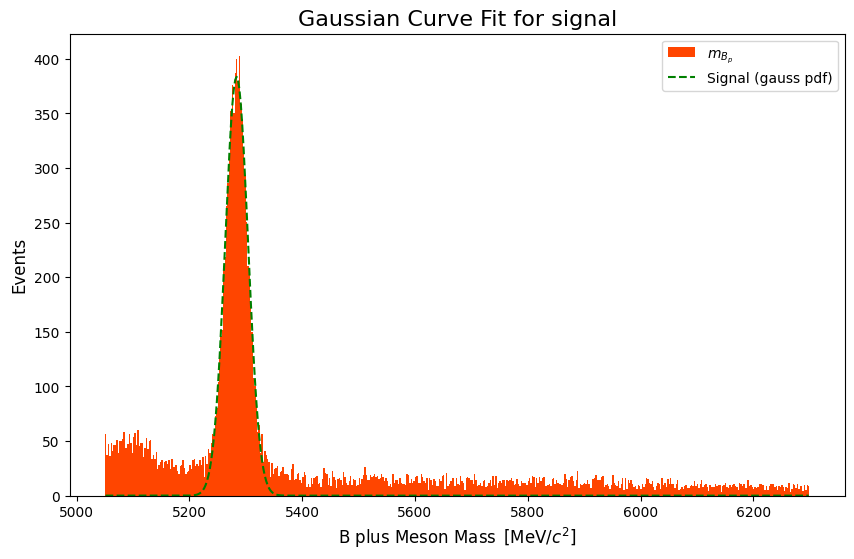

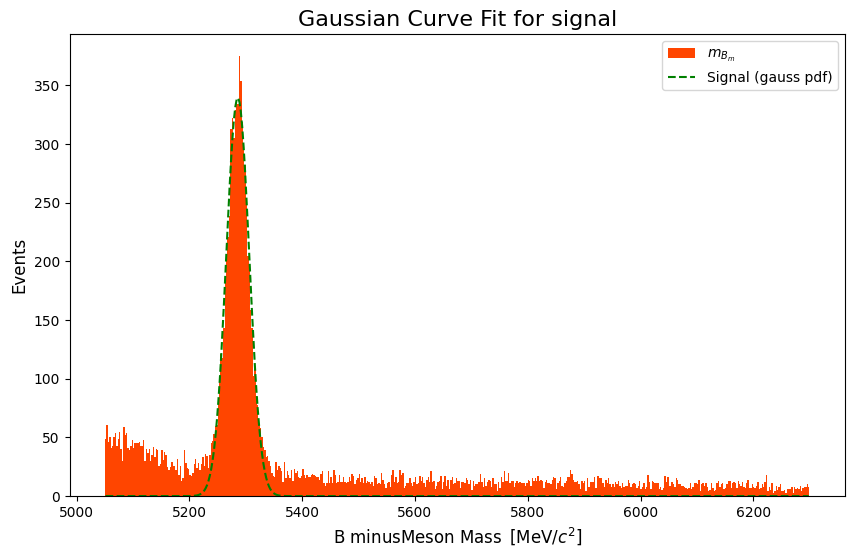

In [193]:
## Figure, axis objects for Bplus
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram and extract bin height and bin edges
bin_height, bin_edge, _ = ax.hist(Bplus_m_M_cut, bins=500, range=(min(Bplus_m_M_cut), max(Bplus_m_M_cut)), label="$m_{{B_p}}$", color="orangered")
bin_centers = (bin_edge[:-1] + bin_edge[1:]) / 2

p0 = [np.max(bin_height), np.mean(m_M_cut), 15]

## Perform the curve fit, calculating the best fit parameters
popt, pcov = curve_fit(gauss, bin_centers, bin_height, p0=p0)
y_gauss = gauss(bin_centers, *popt)

# Plot the Gaussian fit on top of the histogram
ax.plot(bin_centers, y_gauss, label="Signal (gauss pdf)", color="green", linestyle="--")

# Set labels and title
ax.set_xlabel("B plus Meson Mass $\, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=12)
ax.set_ylabel("Events", fontsize=12)
ax.set_title("Gaussian Curve Fit for signal", fontsize=16)
ax.legend()

print(popt)


## Figure, axis objects for Bminus
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram and extract bin height and bin edges
bin_height, bin_edge, _ = ax.hist(Bminus_m_M_cut, bins=500, range=(min(Bminus_m_M_cut), max(Bminus_m_M_cut)), label="$m_{{B_m}}$", color="orangered")
bin_centers = (bin_edge[:-1] + bin_edge[1:]) / 2

p0 = [np.max(bin_height), np.mean(m_M_cut), 15]

## Perform the curve fit, calculating the best fit parameters
popt, pcov = curve_fit(gauss, bin_centers, bin_height, p0=p0)
y_gauss = gauss(bin_centers, *popt)

# Plot the Gaussian fit on top of the histogram
ax.plot(bin_centers, y_gauss, label="Signal (gauss pdf)", color="green", linestyle="--")

# Set labels and title
ax.set_xlabel("B minusMeson Mass $\, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=12)
ax.set_ylabel("Events", fontsize=12)
ax.set_title("Gaussian Curve Fit for signal", fontsize=16)
ax.legend()

print(popt)

<ipython-input-158-697be7b34948>:10: RuntimeWarning: overflow encountered in exp
  return B * np.exp(-lamb * (x-x0))


[3.65792664e+02 5.28382033e+03 1.80694178e+01 2.66380286e+01
 1.74061238e-03 5.30719116e+03]
[3.23381397e+02 5.28586626e+03 1.78392650e+01 2.92130467e+01
 1.77314686e-03 5.23456700e+03]


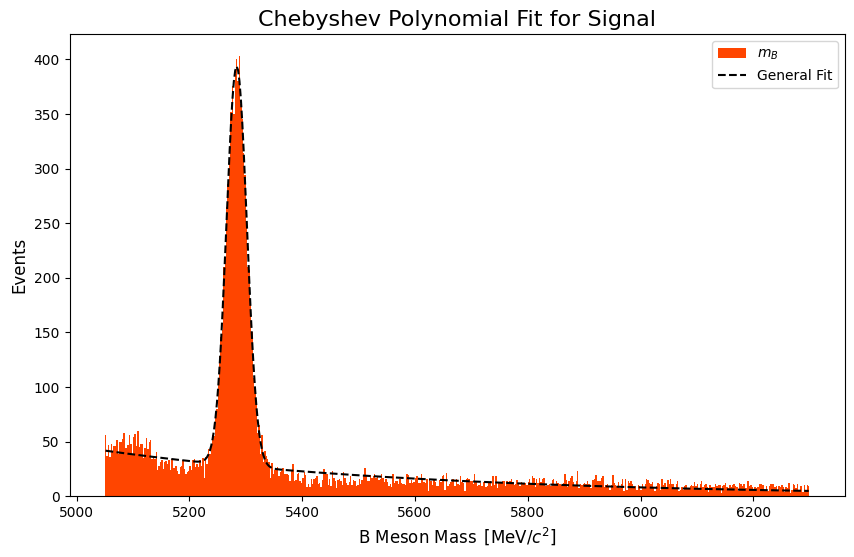

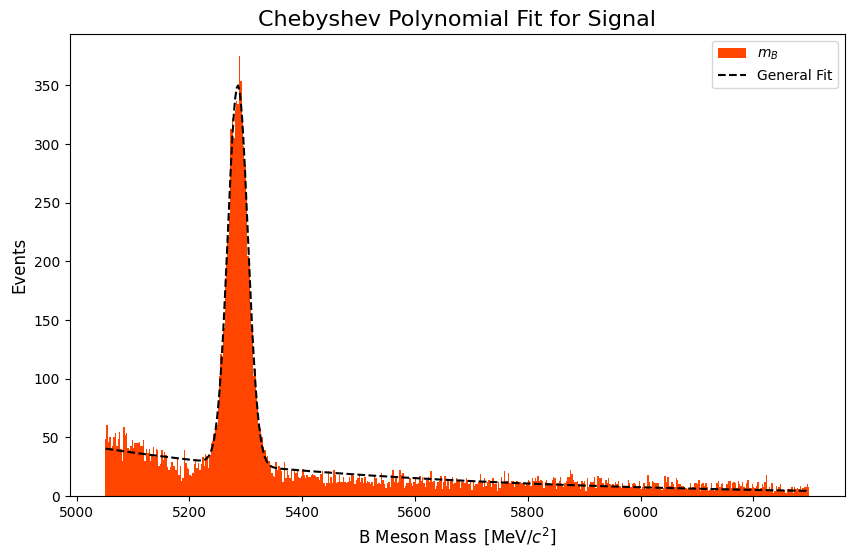

In [194]:
# Create the figure and axis objects Bplus
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram and extract bin height and bin edges
bin_height, bin_edge, _ = ax.hist(Bplus_m_M_cut, bins=500, range=(min(Bplus_m_M_cut), max(Bplus_m_M_cut)), label="$m_{{B}}$", color="orangered")
bin_centers = (bin_edge[:-1] + bin_edge[1:]) / 2


p0 = [383, 5284, 20.31, 45, 0.0017, 5279] # Note: Using the previously used init. param. does not work out properly.

# Perform the curve fit, calculating the best fit parameters
plus_popt_co, pcov_co = curve_fit(combined_pdfs, bin_centers, bin_height, p0=p0)
y_combined = combined_pdfs(bin_centers, *plus_popt_co)

# Plot the each Fit on top of the histogram
ax.plot(bin_centers, y_combined, label="General Fit", color="black", linestyle="--")

# Set labels and title
ax.set_xlabel("B Meson Mass $\, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=12)
ax.set_ylabel("Events", fontsize=12)
ax.set_title("Chebyshev Polynomial Fit for Signal", fontsize=16)
ax.legend()

print(plus_popt_co)

# Create the figure and axis objects Bplus
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram and extract bin height and bin edges
bin_height, bin_edge, _ = ax.hist(Bminus_m_M_cut, bins=500, range=(min(Bminus_m_M_cut), max(Bminus_m_M_cut)), label="$m_{{B}}$", color="orangered")
bin_centers = (bin_edge[:-1] + bin_edge[1:]) / 2

p0 = [339, 5285, 20.25, 45, 0.0017, 5279] # Note: Using the previously used init. param. does not work out properly.

# Perform the curve fit, calculating the best fit parameters
min_popt_co, pcov_co = curve_fit(combined_pdfs, bin_centers, bin_height, p0=p0)
y_combined = combined_pdfs(bin_centers, *min_popt_co)

# Plot the each Fit on top of the histogram
ax.plot(bin_centers, y_combined, label="General Fit", color="black", linestyle="--")

# Set labels and title
ax.set_xlabel("B Meson Mass $\, [\mathrm{{MeV}}/{{c^2}}]$", fontsize=12)
ax.set_ylabel("Events", fontsize=12)
ax.set_title("Chebyshev Polynomial Fit for Signal", fontsize=16)
ax.legend()

print(min_popt_co)

**Ultimately, doing the same analysis as before**

In [197]:
## Signal and Background yield from the model for Bplus
A, mu, sigma, B, lamb, x0 = plus_popt_co

N_sig = A * sigma / np.sqrt(2 * np.pi)
N_background = - B / lamb  * (np.exp(-lamb*(5300-x0)) - np.exp(-lamb*(5050-x0)))

## Signal and Background errors (error propagation)
param_errors = np.sqrt(np.diag(pcov_co))
A_err, mu_err, sigma_err, B_err, lamb_err, x0_err = param_errors
N_sig_err = N_sig * np.sqrt((A_err / popt_co[0])**2 + (sigma_err / popt_co[2])**2)
N_background_err = N_background * np.sqrt((B_err / popt_co[3])**2 + (lamb_err / popt_co[4])**2)
chi2 = np.sum(((bin_height - y_combined) ** 2) / bin_height)

# Preliminary results
print("Results For Bplus: Gaussian (Signal) + Exponential (Background)")
print(f"Signal Yield: {N_sig:.2f} ± {N_sig_err:.2f} events")
print(f"Background Yield: {N_background:.2f} ± {N_background_err:.2f} events")

# Goodness of fit
print(f"Corresponding Chi-Squared: {chi2:.2f}")

N_sig_Bplus = N_sig_err
N_sig_Bplus_err = N_sig_err

## Signal and Background yield from the model for Bminus
A, mu, sigma, B, lamb, x0 = min_popt_co

N_sig = A * sigma / np.sqrt(2 * np.pi)
N_background = - B / lamb  * (np.exp(-lamb*(5300-x0)) - np.exp(-lamb*(5050-x0)))

## Signal and Background errors (error propagation)
param_errors = np.sqrt(np.diag(pcov_co))
A_err, mu_err, sigma_err, B_err, lamb_err, x0_err = param_errors
N_sig_err = N_sig * np.sqrt((A_err / popt_co[0])**2 + (sigma_err / popt_co[2])**2)
N_background_err = N_background * np.sqrt((B_err / popt_co[3])**2 + (lamb_err / popt_co[4])**2)
chi2 = np.sum(((bin_height - y_combined) ** 2) / bin_height)

# Preliminary results
print("Results For Bplus: Gaussian (Signal) + Exponential (Background)")
print(f"Signal Yield: {N_sig:.2f} ± {N_sig_err:.2f} events")
print(f"Background Yield: {N_background:.2f} ± {N_background_err:.2f} events")

# Goodness of fit
print(f"Corresponding Chi-Squared: {chi2:.2f}")

N_sig_Bminus = N_sig
N_sig_err_Bminus = N_sig_err

Results For Bplus: Gaussian (Signal) + Exponential (Background)
Signal Yield: 2636.87 ± 22.36 events
Background Yield: 8448.73 ± 2140402392.86 events
Corresponding Chi-Squared: 899.75
Results For Bplus: Gaussian (Signal) + Exponential (Background)
Signal Yield: 2301.45 ± 19.51 events
Background Yield: 8183.47 ± 2073200676.80 events
Corresponding Chi-Squared: 899.75


**And lastly:** Calculating the asymmetry...

In [201]:
A = (N_sig_Bminus - N_sig_Bplus) / (N_sig_Bminus + N_sig_Bplus)
A_err = np.sqrt((1-A**2)/(N_sig_Bminus + N_sig_Bplus))

print(f"Asymmetry: {A:.5f} ± {A_err:.5f}")

Asymmetry: 0.98076 ± 0.00405


That's it!

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other.

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)